In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
time = np.loadtxt("fit.csv", skiprows=6, delimiter=",", usecols=3)
sq = np.loadtxt("fit.csv", skiprows=6, delimiter=",", usecols=4)
preamp = np.loadtxt("fit2.csv", skiprows=6, delimiter=",", usecols=4)

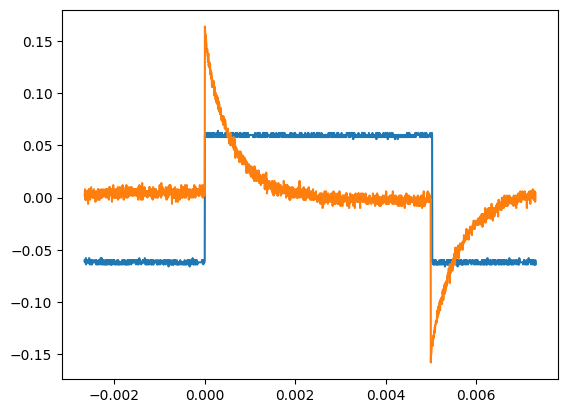

In [3]:
plt.plot(time, sq)
plt.plot(time, preamp)

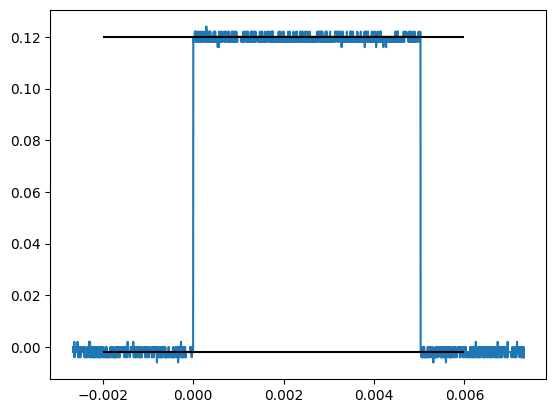

In [4]:
plt.plot(time, sq+0.06)
plt.hlines(-0.002, -0.002, 0.006, color="black")
plt.hlines(0.12, -0.002, 0.006, color="black")
sq_height = 0.12 + 0.002

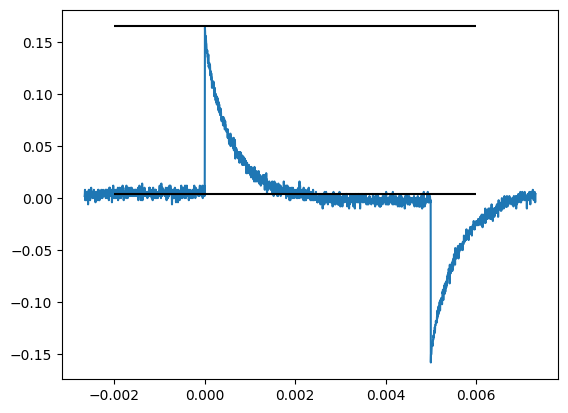

In [5]:
plt.plot(time, preamp)
plt.hlines(0.004, -0.002, 0.006, color="black")
plt.hlines(0.165, -0.002, 0.006, color="black")
preamp_height = 0.165-0.004

In [6]:
V_inj = 1/11 * sq_height
total_gain = preamp_height/V_inj
print(total_gain)

14.516393442622952


In [7]:
# Fit the decay time to exp decay
def exp(x, A, t, C):
    return(A*np.exp(-t*x)+C)

(2.39999999e-05, 0.00498399999)

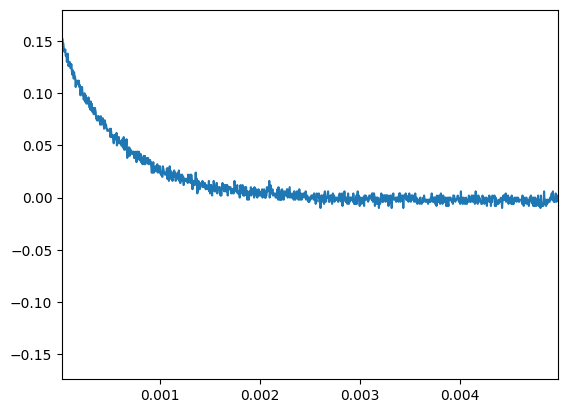

In [8]:
plt.plot(time, preamp)
plt.xlim(time[670], time[1910])

[ 1.51830851e-01  1.66990357e+03 -1.91853603e-03]


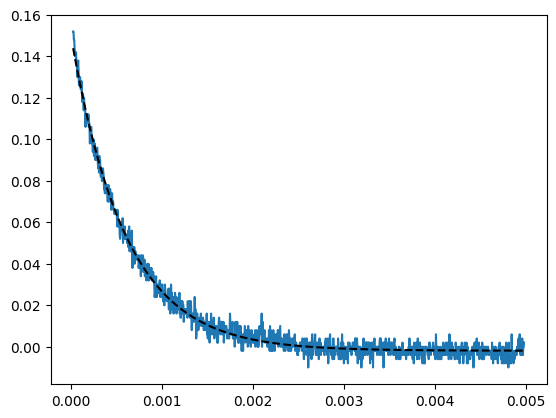

In [9]:
fit_time = time[670:1910]
fit_sig = preamp[670:1910]
popt, pcov = curve_fit(exp, fit_time, fit_sig, p0=[1.52134763e-01, 1.75984573e+03, 0.01])
print(popt)
plt.plot(fit_time, fit_sig)
plt.plot(fit_time, exp(fit_time, *popt), "--", color="black")


In [16]:
tau = 1/popt[1]
print(tau)
print(tau/1e9)
# So we observe about 0.098 pF of stray capacitance in the feedback bit.

0.0005988369750432052
5.988369750432052e-13
